# Import 套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 讀取電子業資料、代碼&公司名分離 (E/S為EBT Growth/Sales Growth)

In [2]:
df_F=pd.read_excel('data.xlsx',encoding='CP950')
df_F.columns = ['Code','Date','Class','EBT Growth','Sales Growth','E/S']
df_F['Code'], df_F['Company'] = df_F['Code'].str.split(' ', 1).str
df_F = df_F[[ 'Code' , 'Company' ,'Date', 'Class','EBT Growth' , 'Sales Growth' ,'E/S']]
df_F

,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S
0,1336,台翰,2019-12-31,OTC,-13.40,-15.62,0.857875
1,1471,首利,2019-12-31,TSE,-9.16,-27.46,0.333576
2,1569,濱川,2019-12-31,OTC,69.72,24.39,2.858549
3,1582,信錦,2019-12-31,TSE,5.82,-2.57,-2.264591
4,1595,川寶,2019-12-31,OTC,-61.59,-1.52,40.519737
...,...,...,...,...,...,...,...
28629,8383,千附,2011-03-31,OTC,193.42,74.08,2.610961
28630,8410,森田,2011-03-31,OTC,-25.20,7.32,-3.442623
28631,8416,實威,2011-03-31,OTC,NaN,NaN,NaN
28632,9912,偉聯,2011-03-31,TSE,126.49,15.68,8.066964


# 排除特定行遺漏值、轉成浮點數

In [3]:
df_F['EBT Growth'] = df_F['EBT Growth'].replace('-',np.NaN).astype('float')
df_F['Sales Growth'] = df_F['Sales Growth'].replace('-',np.NaN).astype('float')

# 擷取年數及月分&排除遺漏值

In [4]:
df_F['Date'] = df_F['Date'].astype('str')
df_F['Date'] = df_F['Date'].str.replace('-','')
df_F['Date'] = df_F['Date'].str[0:6]
df_F.Date = df_F.Date.astype('str')
df_F = df_F.dropna()
df_F

,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S
0,1336,台翰,201912,OTC,-13.40,-15.62,0.857875
1,1471,首利,201912,TSE,-9.16,-27.46,0.333576
2,1569,濱川,201912,OTC,69.72,24.39,2.858549
3,1582,信錦,201912,TSE,5.82,-2.57,-2.264591
4,1595,川寶,201912,OTC,-61.59,-1.52,40.519737
...,...,...,...,...,...,...,...
28627,8299,群聯,201103,OTC,80.80,-7.29,-11.083676
28628,8358,金居,201103,OTC,-35.31,9.58,-3.685804
28629,8383,千附,201103,OTC,193.42,74.08,2.610961
28630,8410,森田,201103,OTC,-25.20,7.32,-3.442623


# 篩選EBT growth & Sales Growth皆為正的筆數

In [5]:
df_F = df_F[df_F['EBT Growth']>0] 
df_F = df_F[df_F['Sales Growth']>0]
df_F = df_F.reset_index()
df_F

,index,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S
0,2,1569,濱川,201912,OTC,69.72,24.39,2.858549
1,5,1785,光洋科,201912,OTC,165.70,5.26,31.501901
2,12,2308,台達電,201912,TSE,27.86,13.13,2.121858
3,14,2313,華通,201912,TSE,42.06,10.52,3.998099
4,23,2329,華泰,201912,TSE,303.18,15.32,19.789817
...,...,...,...,...,...,...,...,...
10155,28616,8210,勤誠,201103,TSE,19.20,1.95,9.846154
10156,28619,8234,新漢,201103,OTC,213.80,39.00,5.482051
10157,28620,8240,華宏,201103,OTC,51.28,16.18,3.169345
10158,28629,8383,千附,201103,OTC,193.42,74.08,2.610961


# 排除前5%極端值

In [6]:
a = df_F.groupby('Date')['E/S'].quantile(0.95)
b = a.tolist()
b = b[::-1]
c = df_F['Date'].tolist()
date_list = []
for i in range(len(c)):
    if c[i] not in date_list:
        date_list.append(c[i])
    else:
        pass
True_list = []
for i in range(len(c)):
    count = 0
    for j in range(len(date_list)):
        if c[i] == date_list[j]:
            count = count
            True_list.append(b[count])
            break
        else:
            count += 1
print(len(True_list))



10160


In [7]:
count_del_list = []
ES_list = df_F['E/S'].tolist()
for i in range(len(True_list)):
    if ES_list[i] > True_list[i]:
       count_del_list.append(i)
    else:
        pass
print(count_del_list) 

[11, 51, 56, 74, 79, 82, 85, 113, 127, 163, 176, 193, 248, 273, 299, 313, 319, 331, 340, 362, 363, 399, 402, 428, 448, 484, 502, 543, 544, 566, 580, 582, 607, 608, 618, 623, 631, 703, 727, 764, 786, 813, 815, 864, 880, 894, 928, 948, 966, 978, 997, 999, 1001, 1002, 1015, 1092, 1104, 1124, 1130, 1145, 1152, 1213, 1232, 1245, 1281, 1300, 1308, 1309, 1317, 1340, 1373, 1374, 1393, 1397, 1484, 1487, 1499, 1510, 1547, 1558, 1579, 1591, 1594, 1607, 1635, 1700, 1726, 1741, 1754, 1761, 1768, 1770, 1818, 1875, 1878, 1886, 1890, 1910, 1930, 1932, 1949, 1990, 2047, 2053, 2076, 2077, 2098, 2103, 2112, 2123, 2146, 2153, 2193, 2246, 2249, 2259, 2268, 2283, 2301, 2315, 2347, 2360, 2401, 2406, 2420, 2435, 2463, 2467, 2551, 2566, 2567, 2574, 2586, 2597, 2602, 2611, 2650, 2652, 2684, 2688, 2690, 2729, 2745, 2763, 2782, 2819, 2863, 2890, 2892, 2910, 2914, 2926, 2928, 2966, 2967, 3009, 3025, 3051, 3060, 3074, 3084, 3129, 3156, 3218, 3239, 3264, 3285, 3318, 3354, 3363, 3379, 3396, 3400, 3412, 3449, 3455, 34

In [8]:
len(count_del_list)

523

In [9]:
df_g = df_F.copy()
print(df_g)

index  Code Company    Date Class  EBT Growth  Sales Growth        E/S
0          2  1569      濱川  201912   OTC       69.72         24.39   2.858549
1          5  1785     光洋科  201912   OTC      165.70          5.26  31.501901
2         12  2308     台達電  201912   TSE       27.86         13.13   2.121858
3         14  2313      華通  201912   TSE       42.06         10.52   3.998099
4         23  2329      華泰  201912   TSE      303.18         15.32  19.789817
...      ...   ...     ...     ...   ...         ...           ...        ...
10155  28616  8210      勤誠  201103   TSE       19.20          1.95   9.846154
10156  28619  8234      新漢  201103   OTC      213.80         39.00   5.482051
10157  28620  8240      華宏  201103   OTC       51.28         16.18   3.169345
10158  28629  8383      千附  201103   OTC      193.42         74.08   2.610961
10159  28632  9912      偉聯  201103   TSE      126.49         15.68   8.066964

[10160 rows x 8 columns]


In [10]:
df_g = df_g.drop(count_del_list)
df_g

,index,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S
0,2,1569,濱川,201912,OTC,69.72,24.39,2.858549
1,5,1785,光洋科,201912,OTC,165.70,5.26,31.501901
2,12,2308,台達電,201912,TSE,27.86,13.13,2.121858
3,14,2313,華通,201912,TSE,42.06,10.52,3.998099
4,23,2329,華泰,201912,TSE,303.18,15.32,19.789817
...,...,...,...,...,...,...,...,...
10155,28616,8210,勤誠,201103,TSE,19.20,1.95,9.846154
10156,28619,8234,新漢,201103,OTC,213.80,39.00,5.482051
10157,28620,8240,華宏,201103,OTC,51.28,16.18,3.169345
10158,28629,8383,千附,201103,OTC,193.42,74.08,2.610961


# 從201209開始計算

In [11]:
df_g = df_g[df_g['Date'] >= '201209']
df_g

,index,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S
0,2,1569,濱川,201912,OTC,69.72,24.39,2.858549
1,5,1785,光洋科,201912,OTC,165.70,5.26,31.501901
2,12,2308,台達電,201912,TSE,27.86,13.13,2.121858
3,14,2313,華通,201912,TSE,42.06,10.52,3.998099
4,23,2329,華泰,201912,TSE,303.18,15.32,19.789817
...,...,...,...,...,...,...,...,...
8981,24200,8114,振樺電,201209,TSE,7.99,5.93,1.347386
8982,24203,8147,正淩,201209,OTC,2.80,2.51,1.115538
8983,24205,8155,博智,201209,OTC,11.39,3.43,3.320700
8984,24208,8176,智捷,201209,OTC,16.91,14.11,1.198441


# 將E/S排名分組排名

In [12]:
df_g['E/S_rank'] = df_g.groupby('Date')['E/S'].rank(ascending=False)
df_g

,index,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S,E/S_rank
0,2,1569,濱川,201912,OTC,69.72,24.39,2.858549,125.0
1,5,1785,光洋科,201912,OTC,165.70,5.26,31.501901,9.0
2,12,2308,台達電,201912,TSE,27.86,13.13,2.121858,153.0
3,14,2313,華通,201912,TSE,42.06,10.52,3.998099,97.0
4,23,2329,華泰,201912,TSE,303.18,15.32,19.789817,22.0
...,...,...,...,...,...,...,...,...,...
8981,24200,8114,振樺電,201209,TSE,7.99,5.93,1.347386,121.0
8982,24203,8147,正淩,201209,OTC,2.80,2.51,1.115538,130.0
8983,24205,8155,博智,201209,OTC,11.39,3.43,3.320700,74.0
8984,24208,8176,智捷,201209,OTC,16.91,14.11,1.198441,128.0


# 篩選每組E/S前50名

In [38]:
df_N = df_g.dropna()
df_N = df_N[df_N['E/S_rank']<=50.0]
df_N

Code
1333    201306
1336    201703
1471    201812
1569    201903
1582    201706
         ...  
8358    201703
8410    201612
8431    201409
8455    201509
9912    201812
Name: Date, Length: 578, dtype: object


# 確認每組是否皆為50筆

In [14]:
df_N.groupby('Date')['Code'].count()


Date
201209    50
201212    50
201303    50
201306    50
201309    50
201312    50
201403    50
201406    50
201409    50
201412    50
201503    50
201506    50
201509    50
201512    50
201603    50
201606    50
201609    50
201612    50
201703    50
201706    50
201709    50
201712    50
201803    50
201806    50
201809    50
201812    50
201903    50
201906    50
201909    50
201912    50
Name: Code, dtype: int64

# 因子值加權-計算權重

In [15]:
df_N['Weight'] = df_N['E/S']/(df_N.groupby('Date')['E/S'].transform('sum'))
df_N['Date'] = df_N['Date'].replace('-','').astype('str')
df_N

,index,Code,Company,Date,Class,EBT Growth,Sales Growth,E/S,E/S_rank,Weight
1,5,1785,光洋科,201912,OTC,165.70,5.26,31.501901,9.0,0.032967
4,23,2329,華泰,201912,TSE,303.18,15.32,19.789817,22.0,0.020710
9,48,2367,燿華,201912,TSE,211.26,14.73,14.342159,34.0,0.015009
13,60,2385,群光,201912,TSE,62.62,6.06,10.333333,39.0,0.010814
16,64,2392,正崴,201912,TSE,170.07,11.27,15.090506,32.0,0.015792
...,...,...,...,...,...,...,...,...,...,...
8968,24137,6282,康舒,201209,TSE,82.15,9.20,8.929348,40.0,0.007755
8972,24165,8047,星雲,201209,OTC,87.54,2.47,35.441296,10.0,0.030779
8973,24166,8048,德勝,201209,OTC,83.26,9.23,9.020585,39.0,0.007834
8976,24179,8076,伍豐,201209,OTC,352.19,5.93,59.391231,5.0,0.051579


# 讀取電子業每日收盤價& 代碼與公司名分離

In [16]:
df_P = pd.read_csv('price.txt',sep='\t')
df_P.columns = ['Code','Date_D','Price','Class']
df_P['Code'], df_P['Company'] = df_P['Code'].str.split(' ', 1).str
df_P = df_P[[ 'Code' , 'Company' ,'Date_D', 'Class','Price']]
df_P['Price'] = df_P['Price'].replace(',','',regex=True).astype('float64')
df_P['Date_D'] = df_P['Date_D'].replace('/','',regex=True).astype('int')
df_P

,Code,Company,Date_D,Class,Price
0,1471,首利,20191231,TSE,2.6400
1,1582,信錦,20191231,TSE,91.0000
2,2059,川湖,20191231,TSE,362.0000
3,2301,光寶科,20191231,TSE,49.3500
4,2302,麗正,20191231,TSE,8.2100
...,...,...,...,...,...
1654886,8277,商丞,20110103,OTC,34.6800
1654887,8289,泰藝,20110103,OTC,15.6389
1654888,8299,群聯,20110103,OTC,113.0809
1654889,8358,金居,20110103,OTC,19.8187


# 依照代碼&日期排序資料&計算日報酬

In [17]:
df_P = df_P.sort_values(['Code','Date_D'])
df_P['Return_D'] = df_P.groupby('Company')['Price'].pct_change()


# 篩選回測期間&排除遺漏值

In [18]:
c = df_P['Date_D'] >= 20130101
d = df_P['Date_D'] <= 20191231
df_P = df_P[ ( c & d ) ]
df_P.dropna()
df_P

,Code,Company,Date_D,Class,Price,Return_D
1322303,1333,恩得利,20130102,OTC,6.8667,0.014778
1321607,1333,恩得利,20130103,OTC,7.0000,0.019413
1320911,1333,恩得利,20130104,OTC,7.0167,0.002386
1320215,1333,恩得利,20130107,OTC,7.1000,0.011872
1319519,1333,恩得利,20130108,OTC,7.0333,-0.009394
...,...,...,...,...,...,...
3771,9912,偉聯,20191225,TSE,8.0000,-0.011125
2932,9912,偉聯,20191226,TSE,8.0000,0.000000
2093,9912,偉聯,20191227,TSE,8.1000,0.012500
1254,9912,偉聯,20191230,TSE,8.5500,0.055556


# 將財報接露時間納入考量:
* 在1月2月只能拿到前一年Q3的資料
* 在3月4月只能拿到前一年Q4的資料
* 在5月6月7月只能拿到當年Q1的資料
* 在8月6月7月只能拿到當年Q2的資料
* 在11月12月只能拿到當年Q3的資料

In [19]:
def make_key(date):
    month = str(date)[4:6]
    year = str(date)[0:4]

    if (month== '05' or month== '06' or month==  '07'  ):
        return year + '03'
    elif (month== '08' or month== '09' or month==  '10'  ):
        return year + '06'
    elif (month== '11' or month== '12' ):
        return year + '09'
    elif (month== '01' or month== '02' ):
        return str(int(year)-1) + '09'
    elif (month=='03' or month=='04'):
        return str(int(year)-1) + '12'


# 將日期對應到財報發布日

In [20]:
df_P['Date_Key'] = df_P['Date_D'].apply(make_key)
df_P.Code     = df_P.Code.astype('str')
df_P.Date_Key = df_P.Date_Key.astype('str')
df_P.Date_D = df_P.Date_D.astype('str')
df_N.Code = df_N.Code.astype('str')
df_N.Date = df_N.Date.replace("-","",regex=True).astype('str')

# 將因子資料與日報酬資料合併

In [21]:
df_final = pd.merge(left=df_P,right=df_N,left_on=['Code','Date_Key'],right_on=['Code','Date'],how='left')
df_final

,Code,Company_x,Date_D,Class_x,Price,Return_D,Date_Key,index,Company_y,Date,Class_y,EBT Growth,Sales Growth,E/S,E/S_rank,Weight
0,1333,恩得利,20130102,OTC,6.8667,0.014778,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1333,恩得利,20130103,OTC,7.0000,0.019413,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1333,恩得利,20130104,OTC,7.0167,0.002386,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1333,恩得利,20130107,OTC,7.1000,0.011872,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1333,恩得利,20130108,OTC,7.0333,-0.009394,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322633,9912,偉聯,20191225,TSE,8.0000,-0.011125,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322634,9912,偉聯,20191226,TSE,8.0000,0.000000,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322635,9912,偉聯,20191227,TSE,8.1000,0.012500,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322636,9912,偉聯,20191230,TSE,8.5500,0.055556,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 檢驗是否有合併成功

In [22]:
# df_final=df_final.dropna()
# df_final.groupby('Date_D')['Code'].count()

# 計算投組報酬

In [23]:
df_final['WeightxReturn'] = df_final['Return_D']*df_final['Weight']
df_final

,Code,Company_x,Date_D,Class_x,Price,Return_D,Date_Key,index,Company_y,Date,Class_y,EBT Growth,Sales Growth,E/S,E/S_rank,Weight,WeightxReturn
0,1333,恩得利,20130102,OTC,6.8667,0.014778,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1333,恩得利,20130103,OTC,7.0000,0.019413,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1333,恩得利,20130104,OTC,7.0167,0.002386,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1333,恩得利,20130107,OTC,7.1000,0.011872,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1333,恩得利,20130108,OTC,7.0333,-0.009394,201209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322633,9912,偉聯,20191225,TSE,8.0000,-0.011125,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322634,9912,偉聯,20191226,TSE,8.0000,0.000000,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322635,9912,偉聯,20191227,TSE,8.1000,0.012500,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322636,9912,偉聯,20191230,TSE,8.5500,0.055556,201909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 按日期分組，加總加權的報酬

In [24]:
Port_return=df_final.groupby('Date_D')['WeightxReturn'].sum()
Port_return.index = pd.to_datetime(Port_return.index.astype('str'))

In [25]:
Port_return

Date_D
2013-01-02    0.014531
2013-01-03    0.003315
2013-01-04   -0.001012
2013-01-07    0.001895
2013-01-08   -0.004644
                ...   
2019-12-25    0.006901
2019-12-26    0.000982
2019-12-27    0.003458
2019-12-30   -0.003225
2019-12-31    0.001847
Name: WeightxReturn, Length: 1717, dtype: float64

# 讀取電子業指數資料&計算日報酬 

In [26]:
df_index=pd.read_csv('index data.txt',encoding='CP950',sep='\t')
df_index.columns = ['Code','Name','Date','Close']
df_index.index=pd.to_datetime(df_index['Date'].astype('str'))
df_index['Return_M'] = df_index['Close'].pct_change()

# 篩選回測期間

In [27]:
df_index = df_index[df_index.Date>=20130101]
df_index = df_index[df_index.Date<=20191231]
df_index['Return_M_Cum'] = ( df_index['Return_M']+1).cumprod()

In [28]:
df_index['Return_P'] = Port_return
df_index['Return_P_Cum'] = ( df_index['Return_P']+1).cumprod()

# 作圖

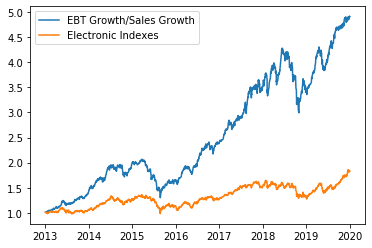

In [29]:
plt.Figure(figsize=(15,7))
plt.plot(df_index['Return_P_Cum'],label='EBT Growth/Sales Growth')
plt.plot(df_index['Return_M_Cum'],label='Electronic Indexes' )
plt.legend()

# 計算投組績效

In [30]:
Geo_a_return_M = (df_index['Return_M_Cum']['2019-12-31'])**(250/len(df_index))-1
Geo_a_return_P = (df_index['Return_P_Cum']['2019-12-31'])**(250/len(df_index))-1

STD_return_M   = df_index['Return_M'].std()*np.sqrt(250)
STD_return_P   = df_index['Return_P'].std()*np.sqrt(250)

Sharpe_M = Geo_a_return_M / STD_return_M 
Sharpe_P = Geo_a_return_P / STD_return_P

#計算MDD
D = df_index['Return_M_Cum'].cummax() - df_index['Return_M_Cum']
MDD = D.max()*1
d = D / (D +df_index['Return_M_Cum'])
mdd_M = d.max()

D = df_index['Return_P_Cum'].cummax() - df_index['Return_P_Cum']
MDD = D.max()*1
d = D / (D +df_index['Return_P_Cum'])
mdd_P = d.max()

#投組勝率
Odd_M =sum(df_index['Return_M']>0)/len(df_index)
Odd_P =sum(df_index['Return_P']>0)/len(df_index)
#.cummax 每一列最大值

In [31]:
df_performance=pd.DataFrame([
                  [Geo_a_return_M,STD_return_M ,Sharpe_M,mdd_M,Odd_M ],
                  [Geo_a_return_P,STD_return_P ,Sharpe_P,mdd_P,Odd_P ]
                 ])

In [32]:
df_performance.columns = [ 'ER','STD','Sharpe','Mdd','Odd' ]
df_performance.index =  ['Benchmark','Portfolio']

# 比較兩者績效

In [33]:
df_performance.round(2)

,ER,STD,Sharpe,Mdd,Odd
Benchmark,0.09,0.15,0.61,0.28,0.53
Portfolio,0.26,0.17,1.58,0.37,0.60
